In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter


In [3]:
df = pd.read_csv("GoldCoast_network.csv")
df_simple_net = df[["From","To"]]
df_simple_net

,From,To
0,1,1371
1,2,2012
2,3,2402
3,4,1875
4,5,1880
...,...,...
11135,4806,1495
11136,4806,3606
11137,4806,415
11138,4807,1433


In [49]:
G = nx.from_pandas_edgelist(df_simple_net,source = "From", target="To", create_using=nx.DiGraph())
Nodes = G.number_of_nodes()
Edges = G.number_of_edges()
Nodes, Edges

(4783, 11140)

In [45]:
in_deg = Counter(dict(G.in_degree()).values())
out_deg = Counter(dict(G.out_degree()).values())


In [24]:
def ccdf(dd):
   dd = pd.DataFrame(list(dd.items()), columns = ("k", "count")).sort_values(by = "k")
   ccdf = dd.sort_values(by = "k", ascending = False)
   ccdf["cumsum"] = ccdf["count"].cumsum()
   ccdf["ccdf"] = ccdf["cumsum"] / ccdf["count"].sum()
   ccdf = ccdf[["k", "ccdf"]].sort_values(by = "k")
   return ccdf

In [29]:
ccdf_in = ccdf(in_deg)
ccdf_out = ccdf(out_deg)


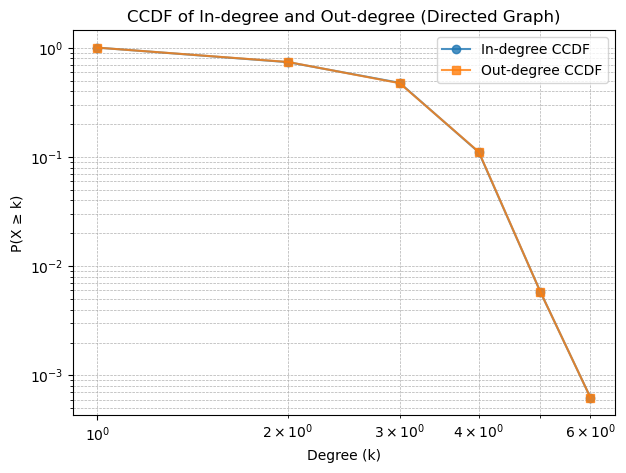

In [30]:
plt.figure(figsize=(7, 5))
plt.plot(ccdf_in["k"], ccdf_in["ccdf"], 'o-', label="In-degree CCDF", alpha=0.8)
plt.plot(ccdf_out["k"], ccdf_out["ccdf"], 's-', label="Out-degree CCDF", alpha=0.8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (k)")
plt.ylabel("P(X ≥ k)")
plt.title("CCDF of In-degree and Out-degree (Directed Graph)")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

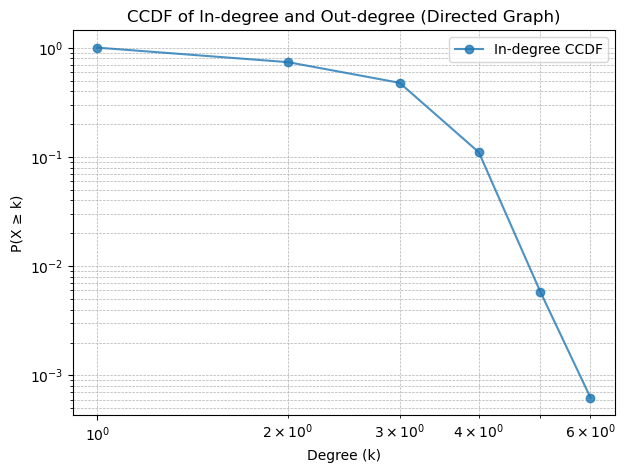

In [31]:
plt.figure(figsize=(7, 5))
plt.plot(ccdf_in["k"], ccdf_in["ccdf"], 'o-', label="In-degree CCDF", alpha=0.8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Degree (k)")
plt.ylabel("P(X ≥ k)")
plt.title("CCDF of In-degree and Out-degree (Directed Graph)")
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

Density calculation and clustering

In [28]:
#Clustering
from collections import Counter
clust = nx.clustering(G, nodes = None, weight= None)
print(clust)
val = clust.values()
trans = nx.transitivity(G)
np.unique(val)

"""     
Clustering appears to be most 0. this could be because they dont create triangles, but squares!
""" 
vals = np.array(list(clust.values()))
unique_vals, counts = np.unique(vals, return_counts=True)
vals

{1: 0, 1371: 0, 2: 0, 2012: 0, 3: 0, 2402: 0, 4: 0, 1875: 0, 5: 0, 1880: 0, 6: 0, 1894: 0, 7: 0, 1970: 0, 8: 0, 1977: 0, 9: 0, 3448: 0, 10: 0, 11: 0, 2867: 0, 12: 0, 3627: 0, 13: 0, 3499: 0, 14: 0, 15: 0, 3441: 0, 16: 0, 3576: 0, 17: 0, 3839: 0, 18: 0, 2452: 0, 19: 0, 2795: 0, 20: 0, 2166: 0, 21: 0, 3843: 0, 22: 0, 3309: 0, 23: 0, 3350: 0, 24: 0, 3728: 0, 25: 0, 3419: 0, 3718: 0, 26: 0, 4769: 0, 27: 0, 3885: 0, 28: 0, 3710: 0, 29: 0, 2791: 0, 30: 0, 3730: 0, 31: 0, 3882: 0, 32: 0, 2799: 0, 33: 0, 1069: 0, 34: 0, 2165: 0, 35: 0, 2982: 0, 36: 0, 2981: 0, 37: 0, 2978: 0.16666666666666666, 38: 0, 3174: 0, 39: 0, 2852: 0, 40: 0, 2180: 0, 41: 0, 1891: 0, 42: 0, 3202: 0, 43: 0, 1968: 0, 44: 0, 2531: 0, 45: 0, 2816: 0, 46: 0, 1978: 0.16666666666666666, 47: 0, 3292: 0, 48: 0, 3293: 0, 49: 0, 3409: 0, 50: 0, 2191: 0, 51: 0, 3235: 0, 52: 0, 3233: 0, 53: 0, 3234: 0, 54: 0, 1349: 0, 55: 0, 2756: 0, 56: 0, 2194: 0, 57: 0, 3171: 0, 58: 0, 2595: 0, 59: 0, 2186: 0, 60: 0, 2755: 0, 61: 0, 2185: 0, 62: 0

array([0.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
       0.16666667], shape=(4783,))

Text(0.5, 1.0, 'Clustering coefficent distribution')

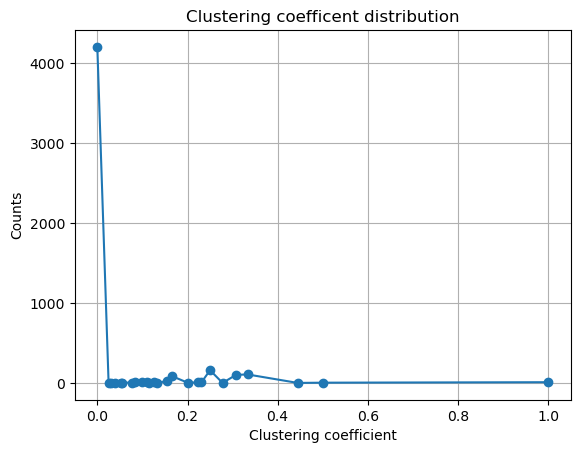

In [27]:
import seaborn as sns
plt.plot(unique_vals,counts, marker="o")
plt.grid()
plt.xlabel("Clustering coefficient")
plt.ylabel("Counts")
plt.title("Clustering coefficent distribution")

In [13]:
density = nx.density(G)
density

#edges/(Nodes*(Nodes-1))

0.0004870518958604349

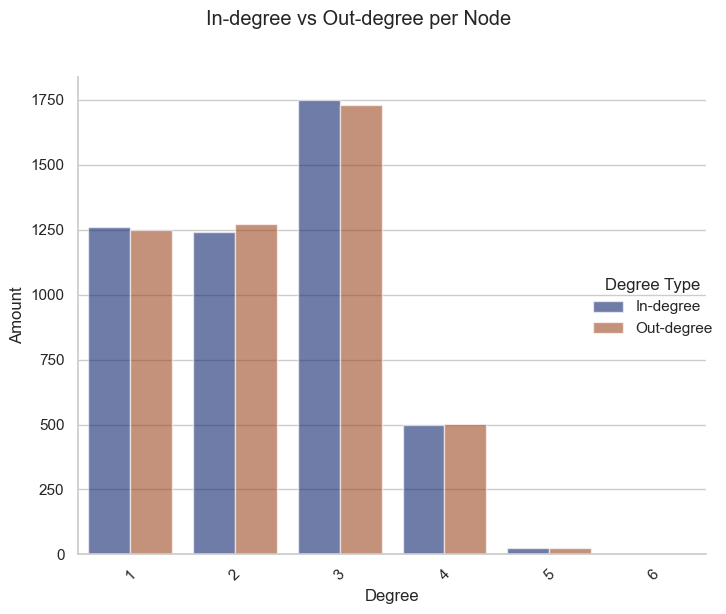

In [58]:
import seaborn as sns
in_deg = dict(sorted(in_deg.items()))
out_deg = dict(sorted(out_deg.items()))
df = pd.DataFrame({
    "Degree": list(in_deg.keys()),
    "In-degree": list(in_deg.values()),
    "Out-degree": list(out_deg.values())
})
df_melt = df.melt(id_vars="Degree", 
                  value_vars=["In-degree", "Out-degree"],
                  var_name="Degree Type", 
                  value_name="Value")
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df_melt, kind="bar",
    x="Degree", y="Value", hue="Degree Type",
    errorbar="sd", palette="dark", alpha=.6, height=6
)
g.set_axis_labels("Degree", "Amount")
g.fig.suptitle("In-degree vs Out-degree per Node", y=1.02)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
df_melt

,Node,Degree Type,Value
0,1,In-degree,1262
1,2,In-degree,1243
2,3,In-degree,1751
3,5,In-degree,25
4,4,In-degree,499
5,6,In-degree,3
6,1,Out-degree,1249
7,2,Out-degree,1273
8,3,Out-degree,1730
9,5,Out-degree,503


Trying Gephi

In [41]:
nx.write_gexf(G, "GoldCoast.gexf")

In [48]:
diameter = nx.diameter(G)

In [49]:
diameter

135

In [57]:
df

,Degree,In-degree,Out-degree
0,1,1262,1249
1,2,1243,1273
2,3,1751,1730
3,5,25,503
4,4,499,25
5,6,3,3


In [56]:
print(in_deg),print(out_deg)

Counter({3: 1751, 1: 1262, 2: 1243, 4: 499, 5: 25, 6: 3})
Counter({3: 1730, 2: 1273, 1: 1249, 4: 503, 5: 25, 6: 3})


(None, None)

In [29]:
edges_bc = nx.edge_betweenness_centrality(G, normalized=True)

In [38]:
max_cent = max(edges_bc.values())
max_id = max(edges_bc, key=edges_bc.get)
max_id, max_cent

((1361, 4516), 0.15045494597621709)

In [40]:
import pandas as pd

input_file = "nodes.tntp"
output_file = "nodes.csv"

data = []
reading = False

with open(input_file, "r") as f:
    for line in f:
        line = line.strip()

        # Skip empty lines
        if not line:
            continue

        # Header is usually first row without numbers
        if line.startswith("node"):
            reading = True
            continue

        if reading:
            # Remove semicolon at end
            line = line.replace(";", "")

            # Split by whitespace
            parts = line.split()

            node = int(parts[0])
            x = float(parts[1])
            y = float(parts[2])

            data.append([node, x, y])

df = pd.DataFrame(data, columns=["node", "x", "y"])
df.to_csv(output_file, index=False)

print("✅ Saved as:", output_file)


✅ Saved as: nodes.csv


In [47]:
edges = df_simple_net
nodes = pd.read_csv("nodes.csv") 
edges

,From,To
0,1,1371
1,2,2012
2,3,2402
3,4,1875
4,5,1880
...,...,...
11135,4806,1495
11136,4806,3606
11137,4806,415
11138,4807,1433


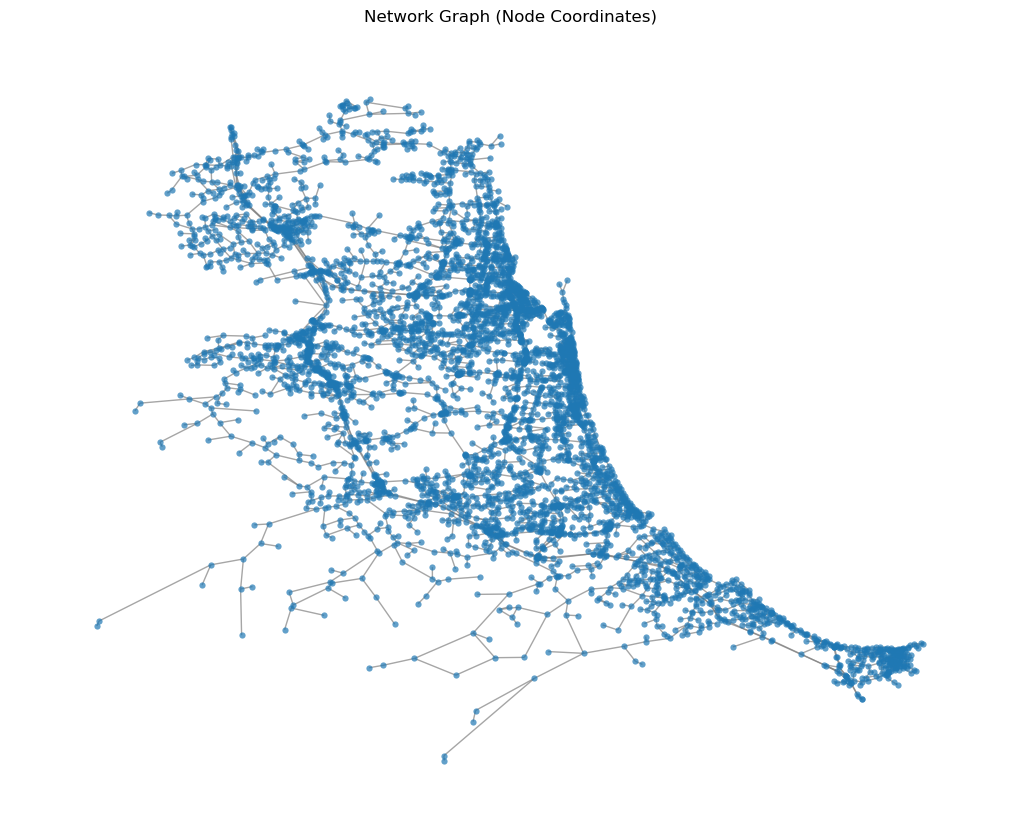

In [48]:
G = nx.from_pandas_edgelist(edges, source="From", target="To")

# Add positions to graph
pos = {row.node: (row.x, row.y) for _, row in nodes.iterrows()}

# Plot
plt.figure(figsize=(10, 8))
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=20,
    linewidths=0,
    edge_color="gray",
    alpha=0.7,
)
plt.title("Network Graph (Node Coordinates)")
plt.show()

In [53]:
random_dir_graph = nx.gnm_random_graph(Nodes, Edges, seed = 69,directed=True, create_using=nx.DiGraph)

In [54]:
print(random_dir_graph)

DiGraph with 4783 nodes and 11140 edges


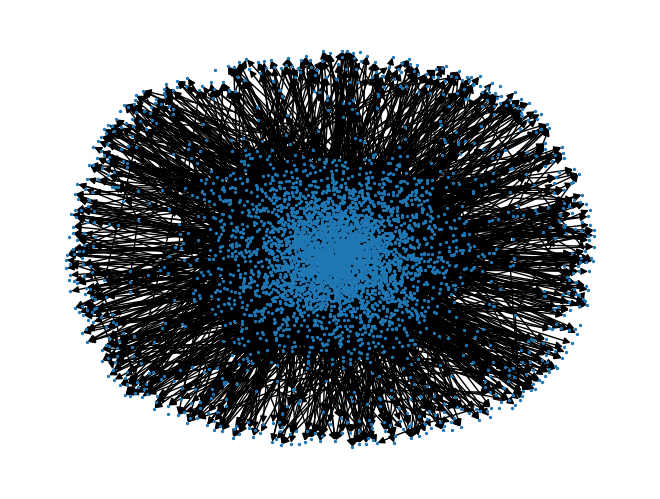

In [57]:
nx.draw(random_dir_graph, node_size = 2)